# Generic PDK

gdsfactory includes a generic Process Design Kit PDK, which is a library of components associated to a generic foundry process `gdsfactory.generic_tech`.
See components available in the [generic component library](https://gdsfactory.github.io/gdsfactory/components.html) that you can customize or adapt to create your own.

The generic process including layer numbers is based on the book "Silicon Photonics Design: From Devices to Systems Lukas Chrostowski, Michael Hochberg".
You can learn more about process design kits (PDKs) [in this tutorial](https://gdsfactory.github.io/gdsfactory/notebooks/08_pdk.html)

## LayerMap

A layer map maps layer names to a integer numbers pair (GDSlayer, GDSpurpose)

Each foundry uses different GDS layer numbers for different process steps.

| GDS (layer, purpose) | layer_name | Description                                                 |
| -------------------- | ---------- | ----------------------------------------------------------- |
| 1 , 0                | WG         | 220 nm Silicon core                                         |
| 2 , 0                | SLAB150    | 150nm Silicon slab (70nm shallow Etch for grating couplers) |
| 3 , 0                | SLAB90     | 90nm Silicon slab (for modulators)                          |
| 4, 0                 | DEEPTRENCH | Deep trench                                                 |
| 47, 0                | MH         | heater                                                      |
| 41, 0                | M1         | metal 1                                                     |
| 45, 0                | M2         | metal 2                                                     |
| 40, 0                | VIAC       | VIAC to contact Ge, NPP or PPP                              |
| 44, 0                | VIA1       | VIA1                                                        |
| 46, 0                | PADOPEN    | Bond pad opening                                            |
| 51, 0                | UNDERCUT   | Undercut                                                    |
| 66, 0                | TEXT       | Text markup                                                 |
| 64, 0                | FLOORPLAN  | Mask floorplan                                              |


In [1]:
from IPython.display import Code

import gdsfactory as gf
from gdsfactory.config import PATH
from gdsfactory.generic_tech import LAYER_STACK, get_generic_pdk
from gdsfactory.generic_tech.get_klayout_pyxs import get_klayout_pyxs
from gdsfactory.technology import LayerLevel, LayerMap, LayerStack, LayerViews
from gdsfactory.typings import Layer

In [2]:
class LAYER(LayerMap):
    """Generic layermap based on book.

    Lukas Chrostowski, Michael Hochberg, "Silicon Photonics Design",
    Cambridge University Press 2015, page 353
    You will need to create a new LayerMap with your specific foundry layers.
    """

    WAFER: Layer = (999, 0)

    WG: Layer = (1, 0)
    WGCLAD: Layer = (111, 0)
    SLAB150: Layer = (2, 0)
    SLAB90: Layer = (3, 0)
    DEEPTRENCH: Layer = (4, 0)
    GE: Layer = (5, 0)
    UNDERCUT: Layer = (6, 0)
    WGN: Layer = (34, 0)
    WGN_CLAD: Layer = (36, 0)

    N: Layer = (20, 0)
    NP: Layer = (22, 0)
    NPP: Layer = (24, 0)
    P: Layer = (21, 0)
    PP: Layer = (23, 0)
    PPP: Layer = (25, 0)
    GEN: Layer = (26, 0)
    GEP: Layer = (27, 0)

    HEATER: Layer = (47, 0)
    M1: Layer = (41, 0)
    M2: Layer = (45, 0)
    M3: Layer = (49, 0)
    VIAC: Layer = (40, 0)
    VIA1: Layer = (44, 0)
    VIA2: Layer = (43, 0)
    PADOPEN: Layer = (46, 0)

    DICING: Layer = (100, 0)
    NO_TILE_SI: Layer = (71, 0)
    PADDING: Layer = (67, 0)
    DEVREC: Layer = (68, 0)
    FLOORPLAN: Layer = (64, 0)
    TEXT: Layer = (66, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    PORTH: Layer = (70, 0)
    SHOW_PORTS: Layer = (1, 12)
    LABEL_SETTINGS: Layer = (202, 0)
    DRC_MARKER: Layer = (205, 0)
    LABEL_INSTANCE: Layer = (206, 0)

    SOURCE: Layer = (110, 0)
    MONITOR: Layer = (101, 0)


LAYER.WG

<LAYER.WG: 1>

In [3]:
layer_wg = (1, 0)
print(layer_wg)

(1, 0)


### Extract layers

You can also extract layers using the `extract` function. This function returns a new flattened Component that contains the extracted layers.
A flat Component does not have references, and all the polygons are absorbed into the top cell.

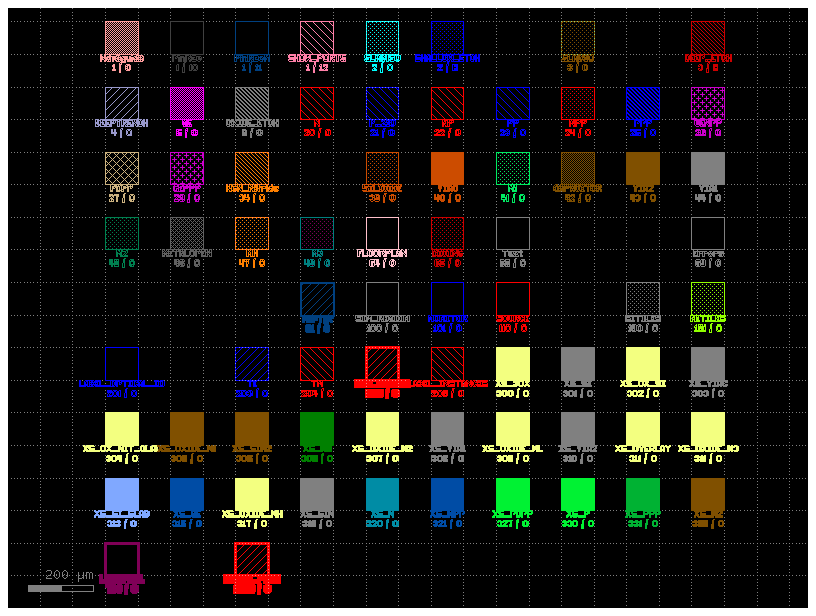

In [4]:
PDK = get_generic_pdk()
PDK.activate()

LAYER_VIEWS = PDK.layer_views
c = LAYER_VIEWS.preview_layerset()
c.plot()

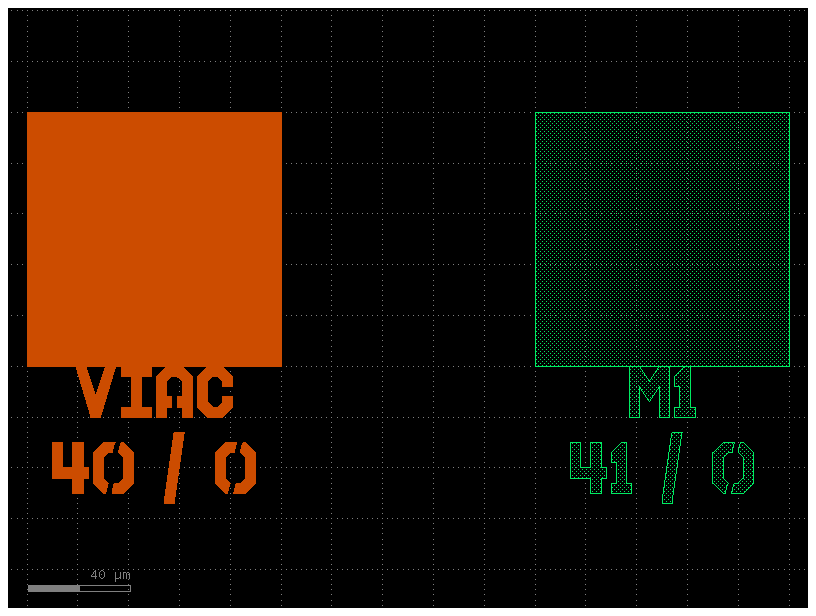

In [5]:
extract = c.extract(layers=((41, 0), (40, 0)))
extract.plot()

### Remove layers

You can remove layers using the `remove_layers()` function.

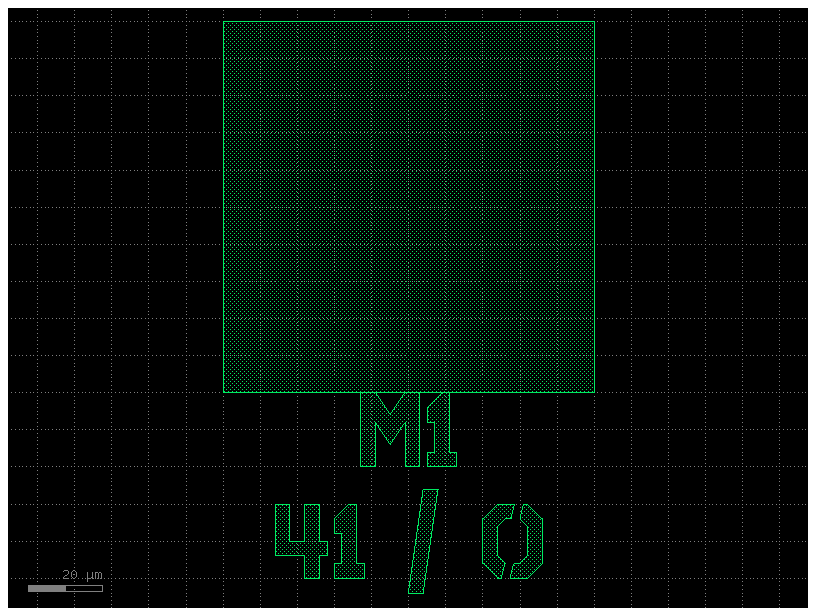

In [6]:
removed = extract.remove_layers(layers=((40, 0),))
removed.plot()

### Remap layers

You can remap (change the polygons from one layer to another layer) using the `remap_layer`, which will return a new `Component`

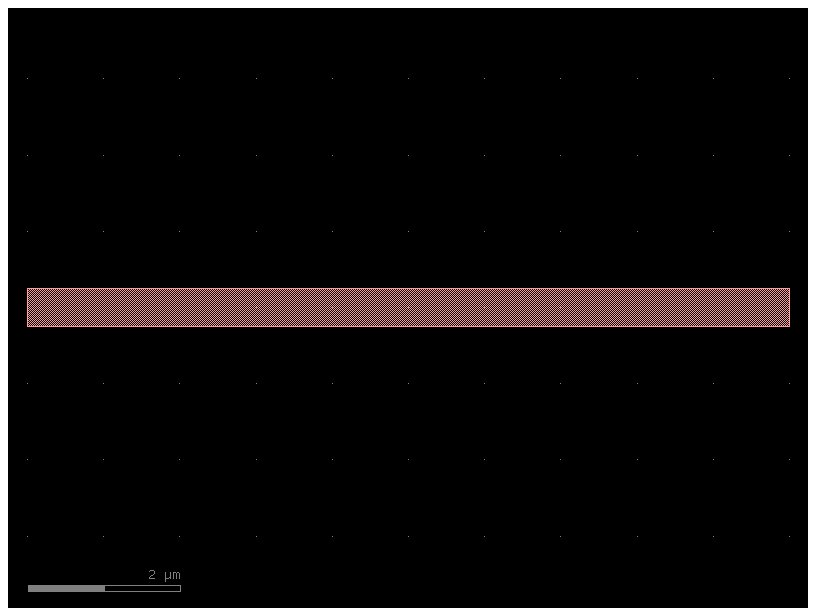

In [7]:
c = gf.components.straight()
c.plot()

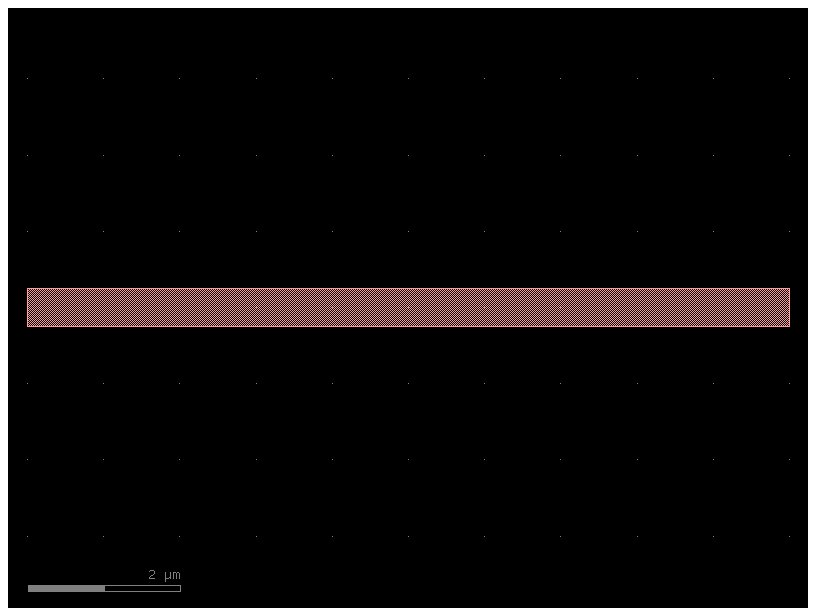

In [8]:
d = c.copy()  # As the object is already in cache we are not allowed to modify the original object
remap = d.remap_layers({(2, 0): (34, 0)})
remap.plot()

## LayerViews

Klayout shows each GDS layer with a color, style and transparency

You can define your layerViews in a klayout Layer Properties file `layers.lyp` or in `YAML` format

We recommend using YAML and then generate the lyp in klayout, as YAML is easier to modify than XML.

In [9]:
Code(filename=PATH.klayout_yaml)

LayerViews:
  Waveguide:
    layer: [1, 0]
    hatch_pattern: dotted
    width: 1
    color: "#ff9d9d"
  WGCLAD:
    layer: [111, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    visible: false
    width: 1
    color: "silver"
  SLAB150:
    layer: [2, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    transparent: true
    width: 1
    color: "cyan"
  SHALLOW_ETCH:
    layer: [2, 6]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    color: "blue"
  SLAB90:
    layer: [3, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    transparent: true
    width: 1
    color: "#805000"
  DEEP_ETCH:
    layer: [3, 6]
    layer_in_name: true
    hatch_pattern: left-hatched
    color: "#cc0000"
  SLAB150CLAD:
    layer: [2, 9]
    layer_in_name: true
    frame_color: "#9999cc"
    fill_color: "#80a8ff"
    hatch_pattern: coarsely dotted
    visible: false
    width: 1
  SLAB90CLAD:
    layer: [3, 1]
    layer_in_name: true
    frame_color: "#9999cc"
    fill_color: "#80a8ff"
    hatch_pattern: hollow
    visible: false
    width: 1
  Doping:
    group_members:
      N:
        layer: [20, 0]
        layer_in_name: true
        hatch_pattern: lightly left-hatched
        width: 1
        color: "red"
      NP:
        layer: [22, 0]
        layer_in_name: true
        hatch_pattern: lightly left-hatched
        width: 1
        color: "red"
      NPP:
        layer: [24, 0]
        layer_in_name: true
        hatch_pattern: coarsely dotted
        width: 1
        color: "red"
      P_210:
        layer: [21, 0]
        hatch_pattern: lightly left-hatched
        transparent: true
        width: 1
        color: "blue"
      PP:
        layer: [23, 0]
        layer_in_name: true
        hatch_pattern: lightly left-hatched
        width: 1
        color: "blue"
      PPP:
        layer: [25, 0]
        layer_in_name: true
        hatch_pattern: strongly left-hatched dense
        width: 1
        color: "blue"
      PDPP:
        layer: [27, 0]
        layer_in_name: true
        hatch_pattern: lightly cross-hatched
        width: 1
        color: "#ccb27f"
      GENPP:
        layer: [26, 0]
        layer_in_name: true
        hatch_pattern: plus
        width: 1
        color: "#cc00cc"
      GEPPP:
        layer: [29, 0]
        layer_in_name: true
        hatch_pattern: plus
        width: 1
        color: "#cc00cc"
  WGN_Nitride:
    layer: [34, 0]
    layer_in_name: true
    hatch_pattern: left-hatched
    transparent: true
    width: 1
    color: "#ff8000"
  WGclad_material:
    layer: [36, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    visible: false
    width: 1
    color: "silver"
  GE:
    layer: [5, 0]
    layer_in_name: true
    hatch_pattern: dotted
    width: 1
    color: "magenta"
  SILICIDE:
    layer: [39, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    width: 1
    color: "#cc4c00"
  MH:
    layer: [47, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    transparent: true
    width: 1
    color: "#ff8000"
  M1:
    layer: [41, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    width: 1
    color: "#01ff6b"
    brightness: -16
  M2:
    layer: [45, 0]
    layer_in_name: true
    hatch_pattern: coarsely dotted
    width: 1
    color: "#008050"
  M3:
    layer: [49, 0]
    layer_in_name: true
    frame_color: "teal"
    fill_color: "#800057"
    hatch_pattern: coarsely dotted
  VIAC:
    layer: [40, 0]
    layer_in_name: true
    hatch_pattern: solid
    width: 1
    color: "#cc4c00"
  VIA1:
    layer: [44, 0]
    layer_in_name: true
    hatch_pattern: solid
    width: 1
    color: "grey"
  VIA2:
    layer: [43, 0]
    layer_in_name: true
    hatch_pattern: solid
    width: 1
    color: "#805000"
  CAPACITOR:
    layer: [42, 0]
    layer_in_name: true
    hatch_pattern: dotted
    width: 1
    color: "#805000"
  METALOPEN:
    layer: [46, 0]
    layer_in_name: true
    hatch_pattern: cross-hatched
    widt

Once you modify the `YAML` file you can easily write it to klayout layer properties `lyp` or the other way around.

```
YAML <---> LYP
```

The functions `LayerView.to_lyp(filepath)` and `LayerView.to_yaml(filepath)` allow you to convert from each other.

LYP is based on XML so it's much easier to make changes and maintain the equivalent YAML file.

### YAML -> LYP

You can easily convert from YAML into Klayout Layer Properties.

In [10]:
LAYER_VIEWS = LayerViews(filepath=PATH.klayout_lyp)
LAYER_VIEWS.to_lyp("extra/klayout_layers.lyp")

PosixPath('extra/klayout_layers.lyp')

### LYP -> YAML

Sometimes you start from an LYP XML file. We recommend converting to YAML and using the YAML as the layer views source of truth.

Layers in YAML are easier to read and modify than doing it in klayout XML format.

In [11]:
LAYER_VIEWS = LayerViews(filepath=PATH.klayout_lyp)
LAYER_VIEWS.to_yaml("extra/layers.yaml")

### Preview layerset

You can preview all the layers defined in your `LayerViews`

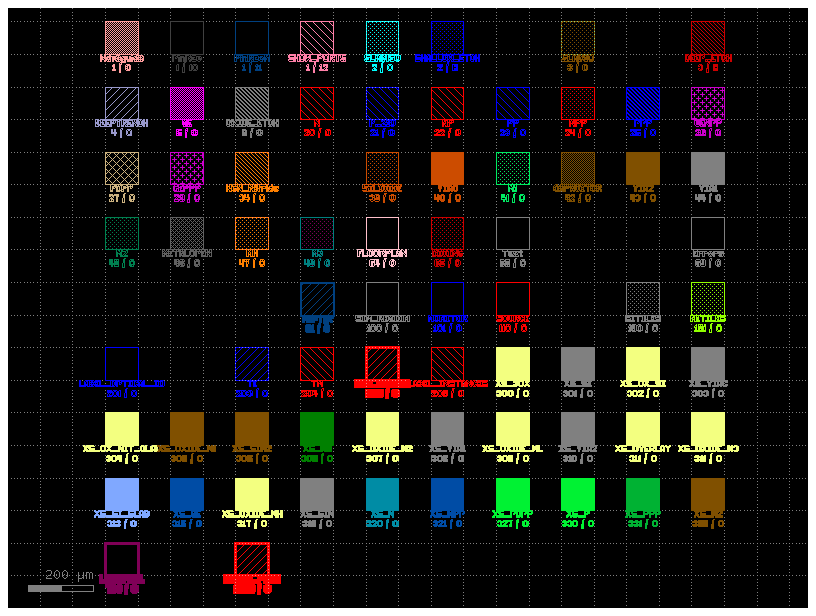

In [12]:
c = LAYER_VIEWS.preview_layerset()
c.plot()

By default the generic PDK has some layers that are not visible and therefore are not shown.

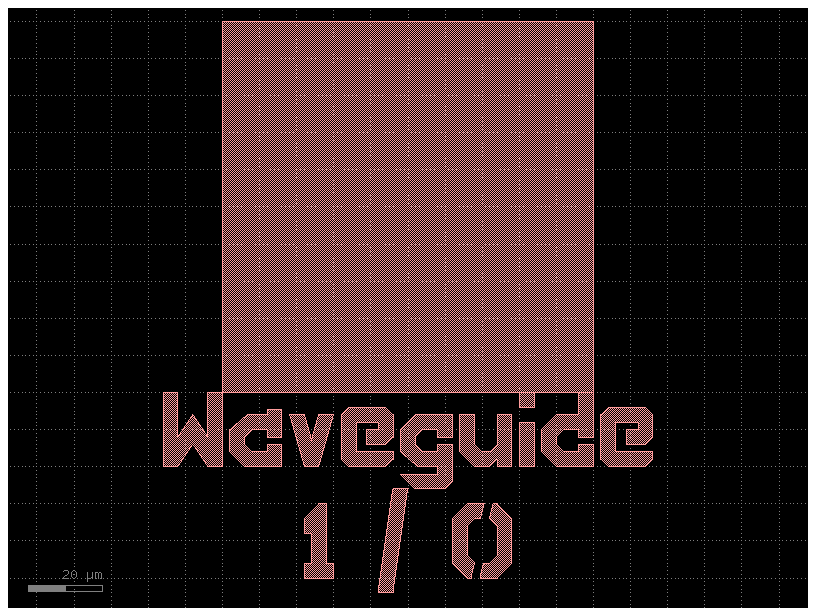

In [13]:
c_wg_clad = c.extract(layers=[(1, 0)])
c_wg_clad.plot()

In [14]:
LAYER_VIEWS.layer_views["WGCLAD"]

LayerView:
	info: None
	layer: (111, 0)
	layer_in_name: True
	frame_color: silver
	fill_color: silver
	frame_brightness: 0
	fill_brightness: 0
	hatch_pattern: coarsely dotted
	line_style: None
	valid: True
	visible: False
	transparent: False
	width: 1
	marked: False
	xfill: False
	animation: 0
	group_members: {}

In [15]:
LAYER_VIEWS.layer_views["WGCLAD"].visible

False

You can make it visible

In [16]:
LAYER_VIEWS.layer_views["WGCLAD"].visible = True

In [17]:
LAYER_VIEWS.layer_views["WGCLAD"].visible

True

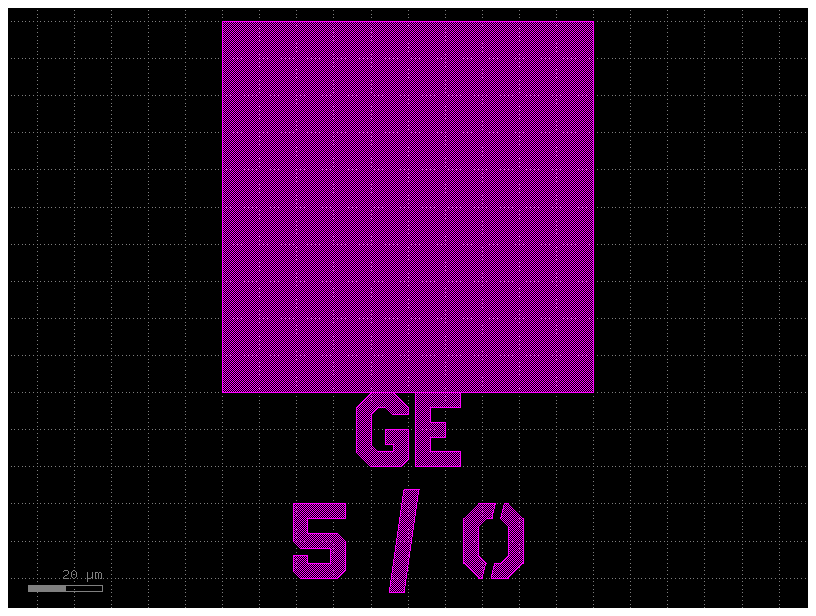

In [18]:
c_ge = c.extract(layers=[(5, 0)])
c_ge.plot()

## LayerStack

Each layer also includes the information of thickness and position of each layer after fabrication.

This LayerStack can be used for creating a 3D model with `Component.to_3d` or running Simulations.

A GDS has different layers to describe the different fabrication process steps. And each grown layer needs thickness information and z-position in the stack.

![layer stack](https://i.imgur.com/GUb1Kav.png)

Lets define the layer stack for the generic layers in the generic_technology.

In [19]:
import gdsfactory as gf
from gdsfactory.generic_tech.layer_map import LAYER
from gdsfactory.technology import LogicalLayer

nm = 1e-3
thickness_wg = 220 * nm
thickness_slab_deep_etch = 90 * nm
thickness_slab_shallow_etch = 150 * nm

sidewall_angle_wg = 0
layer_core = LogicalLayer(layer=LAYER.WG)
layer_shallow_etch = LogicalLayer(layer=LAYER.SHALLOW_ETCH)
layer_deep_etch = LogicalLayer(layer=LAYER.DEEP_ETCH)


layers = {
    "core": LayerLevel(
        layer=layer_core - layer_deep_etch - layer_shallow_etch,
        thickness=thickness_wg,
        zmin=0.0,
        material="si",
        mesh_order=2,
        sidewall_angle=sidewall_angle_wg,
        width_to_z=0.5,
        derived_layer=layer_core,
    ),
    "shallow_etch": LayerLevel(
        layer=LogicalLayer(layer=LAYER.SHALLOW_ETCH),
        thickness=thickness_wg - thickness_slab_shallow_etch,
        zmin=0.0,
        material="si",
        mesh_order=1,
        derived_layer=LogicalLayer(layer=LAYER.SLAB150),
    ),
    "deep_etch": LayerLevel(
        layer=LogicalLayer(layer=LAYER.DEEP_ETCH),
        thickness=thickness_wg - thickness_slab_deep_etch,
        zmin=0.0,
        material="si",
        mesh_order=1,
        derived_layer=LogicalLayer(layer=LAYER.SLAB90),
    ),
    "slab150": LayerLevel(
        layer=LogicalLayer(layer=LAYER.SLAB150),
        thickness=150e-3,
        zmin=0,
        material="si",
        mesh_order=3,
    ),
    "slab90": LayerLevel(
        layer=LogicalLayer(layer=LAYER.SLAB90),
        thickness=thickness_slab_deep_etch,
        zmin=0.0,
        material="si",
        mesh_order=2,
    ),
}


layer_stack = LayerStack(layers=layers)

c = gf.c.grating_coupler_elliptical_trenches()
s = c.to_3d(layer_stack=layer_stack)
s.show()

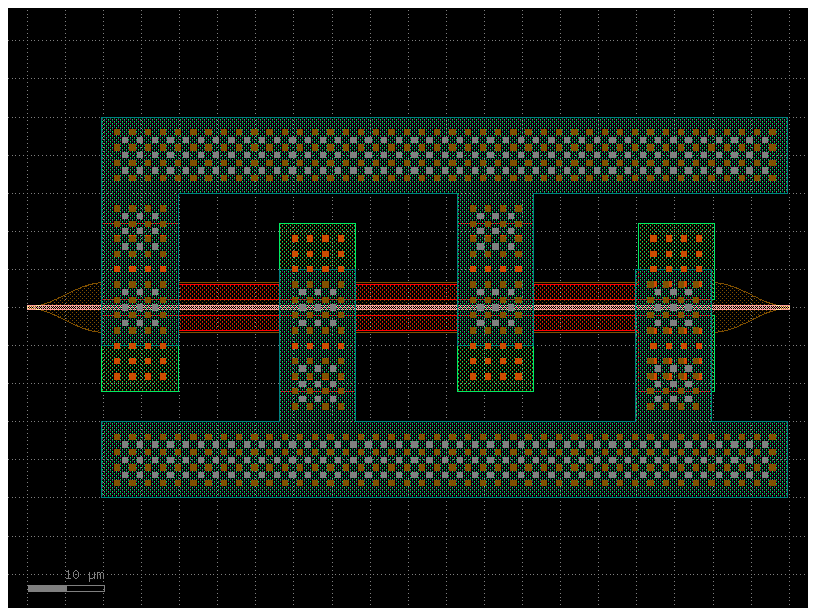

In [20]:
from gdsfactory.generic_tech.layer_stack import get_layer_stack

layer_stack220 = get_layer_stack()

c = gf.c.straight_heater_doped_rib(length=100)
c

In [21]:
scene = c.to_3d(layer_stack=layer_stack220)
scene.show()

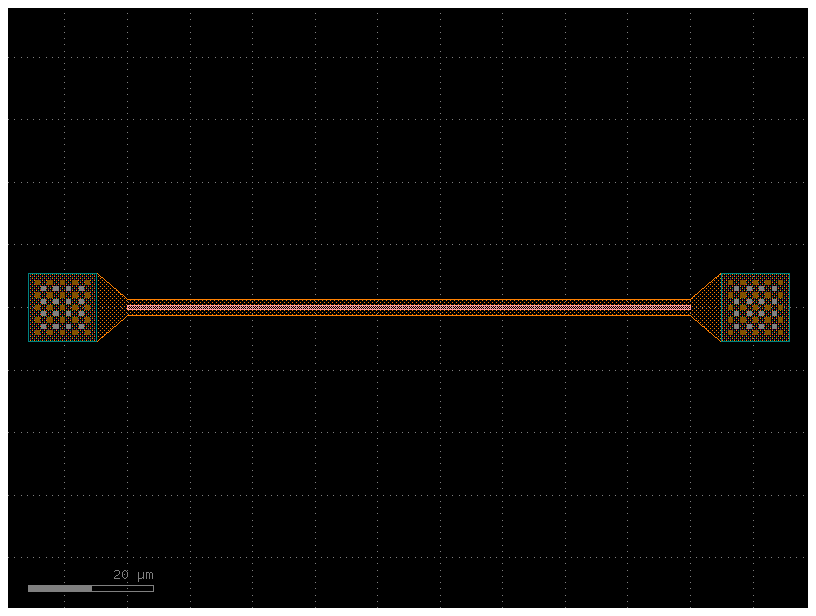

In [22]:
c = gf.components.straight_heater_metal(length=90)
c.plot()

In [23]:
scene = c.to_3d(layer_stack=layer_stack220)
scene.show()

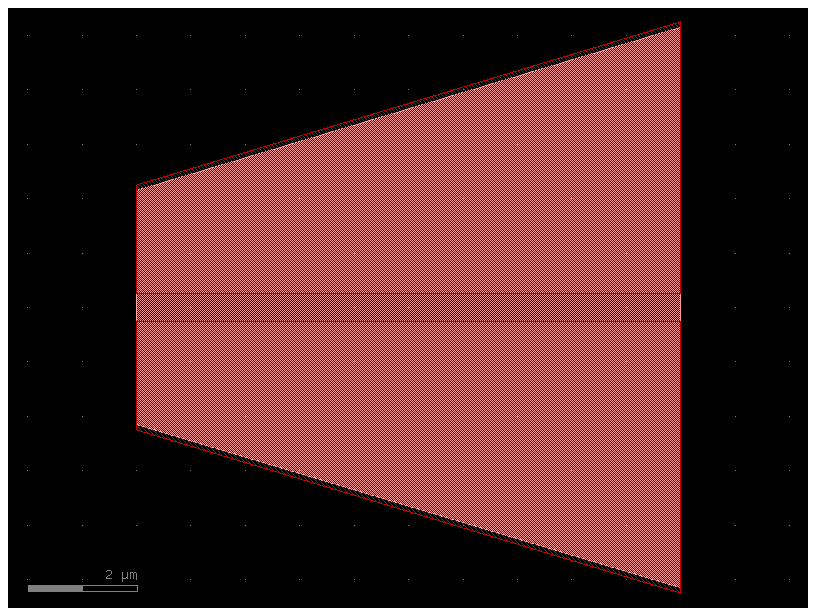

In [24]:
c = gf.components.taper_strip_to_ridge_trenches()
c.plot()

In [25]:
scene = c.to_3d(layer_stack=layer_stack220)
scene.show()

In [26]:
# lets assume we have 900nm silicon instead of 220nm, You will see a much thicker waveguide under the metal heater.
layer_stack900 = get_layer_stack(thickness_wg=900 * nm)
scene = c.to_3d(layer_stack=layer_stack900)
scene.show()

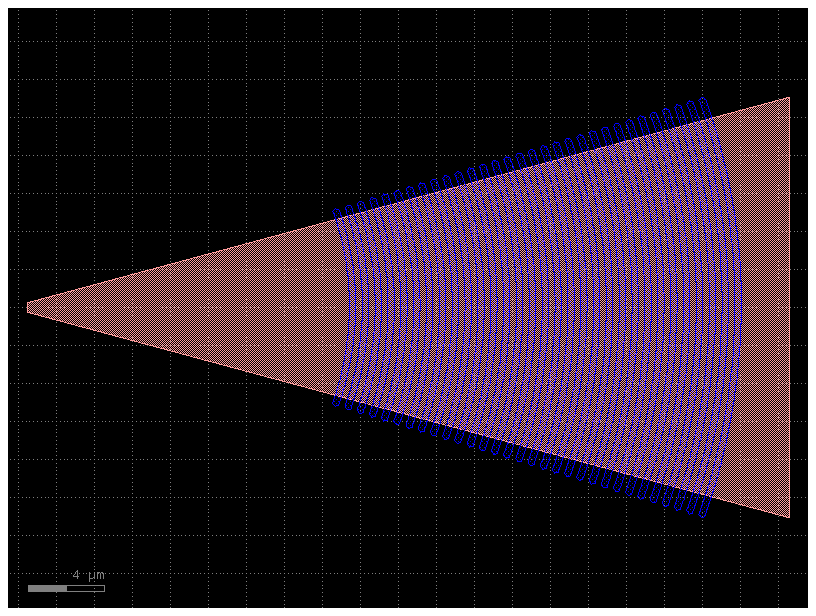

In [27]:
import gdsfactory as gf

c = gf.components.grating_coupler_elliptical_trenches()
c.plot()

In [28]:
scene = c.to_3d()
scene.show()

### 3D rendering

To render components in 3D you will need to define two things:

1. LayerStack: for each layer contains thickness of each material and z position
2. LayerViews: for each layer contains view (color, pattern, opacity). You can load it with `gf.technology.LayerView.load_lyp()`

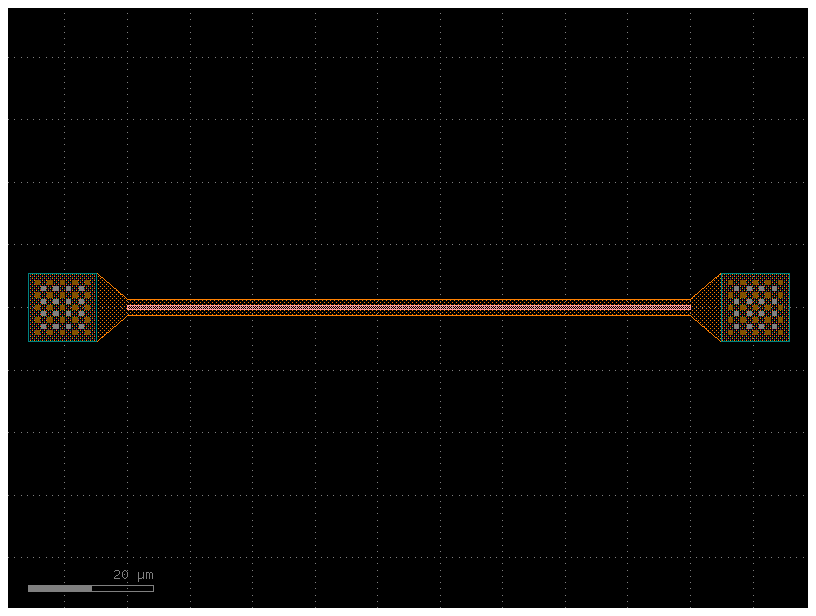

In [29]:
heater = gf.components.straight_heater_metal(length=90)
heater.plot()

In [30]:
scene = heater.to_3d()
scene.show()

### Klayout 2.5D view

From the `LayerStack` you can generate the KLayout 2.5D view script.

In [31]:
LAYER_STACK.get_klayout_3d_script()

'core = input(1, 0)\nshallow_etch = input(2, 0)\ndeep_etch = input(3, 0)\n\nsubstrate = input(999, 0)\nbox = input(999, 0)\ndeep_etch = input(3, 6)\nclad = input(999, 0)\nslab150 = input(2, 0)\nslab90 = input(3, 0)\nnitride = input(34, 0)\nge = input(5, 0)\nundercut = input(6, 0)\nvia_contact = input(40, 0)\nmetal1 = input(41, 0)\nheater = input(47, 0)\nvia1 = input(44, 0)\nmetal2 = input(45, 0)\nvia2 = input(43, 0)\nmetal3 = input(49, 0)\n\nunetched_WG = WG - core\nunetched_SLAB150 = SLAB150 - shallow_etch\n\nslab_WG_core = WG & core\nslab_SLAB150_shallow_etch = SLAB150 & shallow_etch\nslab_SLAB90_deep_etch = SLAB90 & deep_etch\n\n'

Then you go go Tools → Manage Technologies


![klayout](https://i.imgur.com/KCcMRBO.png)

and Paste the 2.5D view script

![paste](https://i.imgur.com/CoTythB.png)

### Klayout cross-section

You can also install the [KLayout cross-section plugin](https://gdsfactory.github.io/klayout_pyxs/README.html)

![xsection](https://i.imgur.com/xpPS8fM.png)

This is not integrated with the LayerStack but you can customize the script in `gdsfactory.generic_tech.get_klayout_pyxs` for your technology.

In [32]:
nm = 1e-3
if __name__ == "__main__":
    script = get_klayout_pyxs(
        t_box=2.0,
        t_slab=110 * nm,
        t_si=220 * nm,
        t_ge=400 * nm,
        t_nitride=400 * nm,
        h_etch1=0.07,
        h_etch2=0.06,
        h_etch3=0.09,
        t_clad=0.6,
        t_m1=0.5,
        t_m2=0.5,
        t_m3=2.0,
        gap_m1_m2=0.6,
        gap_m2_m3=0.3,
        t_heater=0.1,
        gap_oxide_nitride=0.82,
        t_m1_oxide=0.6,
        t_m2_oxide=2.0,
        t_m3_oxide=0.5,
        layer_wg=(1, 0),
        layer_fc=(2, 0),
        layer_rib=LAYER.SLAB90,
        layer_n=LAYER.N,
        layer_np=LAYER.NP,
        layer_npp=LAYER.NPP,
        layer_p=LAYER.P,
        layer_pp=LAYER.PP,
        layer_ppp=LAYER.PPP,
        layer_PDPP=LAYER.GEP,
        layer_nitride=LAYER.WGN,
        layer_Ge=LAYER.GE,
        layer_GePPp=LAYER.GEP,
        layer_GeNPP=LAYER.GEN,
        layer_viac=LAYER.VIAC,
        layer_viac_slot=LAYER.VIAC,
        layer_m1=LAYER.M1,
        layer_mh=LAYER.HEATER,
        layer_via1=LAYER.VIA1,
        layer_m2=LAYER.M2,
        layer_via2=LAYER.VIA2,
        layer_m3=LAYER.M3,
        layer_open=LAYER.PADOPEN,
    )

    # script_path = pathlib.Path(__file__).parent.absolute() / "xsection_planarized.pyxs"
    # script_path.write_text(script)
    print(script)



t_box=2.0
t_slab=0.11
t_si=0.22
t_ge=0.4
t_nitride=0.4
h_etch1=0.07
h_etch2=0.06
h_etch3=0.09
t_clad=0.6
t_m1=0.5
t_m2=0.5
t_m3=2.0
t_heater=0.1
gap_m1_m2=0.6
gap_m2_m3=0.3
gap_oxide_nitride=0.82
t_m1_oxide=0.6
t_m2_oxide=2.0
t_m3_oxide=0.5

l_wg = layer('1/0')
l_fc = layer('2/0')
l_rib = layer('3/0')

l_n = layer('20/0')
l_np = layer('22/0')
l_npp = layer('24/0')
l_p = layer('21/0')
l_pp = layer('23/0')
l_ppp = layer('25/0')
l_PDPP = layer('27/0')
l_bottom_implant = l_PDPP

l_nitride = layer('34/0')
l_Ge = layer('5/0')
l_GePPp = layer('27/0')
l_GeNPP = layer('26/0')

l_viac = layer('40/0')
l_viac_slot = layer('40/0')
l_m1 = layer('41/0')
l_mh = layer('47/0')
l_via1 = layer('44/0')
l_m2 = layer('45/0')
l_via2 = layer('43/0')
l_m3 = layer('49/0')
l_open = layer('46/0')

l_top_implant = l_GePPp.or_(l_GeNPP)
l_viac = l_viac.or_(l_viac_slot)

# Declare the basic accuracy used to remove artifacts for example: delta(5 * dbu)
delta(dbu)
depth(12.0)
height(12.0)

################ front-end



![xsection generic](https://i.imgur.com/H5Qiygc.png)

## Process

The LayerStack uses the GDS layers to generate a representation of the chip after fabrication.

The KLayout cross-section module uses the GDS layers to return a geometric approximation of the processed wafer.

Sometimes, however, physical process modeling is desired.

For these purposes, Processes acting on an initial substrate "wafer stack" can be defined. The waferstack is a LayerStack representing the initial state of the wafer. The processes take in some combination of GDS layers (which may differ from their use in the resulting LayerStack), some processing parameters, and are then run in a sequence.

For instance, the early step of the front-end-of-line of the generic process could be approximated as done in `gdsfactory.technology.layer_stack` (the process classes are described in `gdsfactory.technology.processes`):

In [33]:
import gdsfactory.technology.processes as gp


def get_process():
    """Returns generic process to generate LayerStack.

    Represents processing steps that will result in the GenericLayerStack, starting from the waferstack LayerStack.

    based on paper https://www.degruyter.com/document/doi/10.1515/nanoph-2013-0034/html
    """
    return (
        gp.Etch(
            name="strip_etch",
            layer=(1, 0),
            positive_tone=False,
            depth=0.22 + 0.01,  # slight overetch for numerics
            material="core",
            resist_thickness=1.0,
        ),
        gp.Etch(
            name="slab_etch",
            layer=LAYER.SLAB90,
            layers_diff=[(1, 0)],
            depth=0.22 - 0.09,
            material="core",
            resist_thickness=1.0,
        ),
        # See gplugins.process.implant tables for ballpark numbers
        # Adjust to your process
        gp.ImplantPhysical(
            name="deep_n_implant",
            layer=LAYER.N,
            energy=100,
            ion="P",
            dose=1e12,
            resist_thickness=1.0,
        ),
        gp.ImplantPhysical(
            name="shallow_n_implant",
            layer=LAYER.N,
            energy=50,
            ion="P",
            dose=1e12,
            resist_thickness=1.0,
        ),
        gp.ImplantPhysical(
            name="deep_p_implant",
            layer=LAYER.P,
            energy=50,
            ion="B",
            dose=1e12,
            resist_thickness=1.0,
        ),
        gp.ImplantPhysical(
            name="shallow_p_implant",
            layer=LAYER.P,
            energy=15,
            ion="B",
            dose=1e12,
            resist_thickness=1.0,
        ),
        # "Temperatures of ~1000C for not more than a few seconds"
        # Adjust to your process
        # https://en.wikipedia.org/wiki/Rapid_thermal_processing
        gp.Anneal(
            name="dopant_activation",
            time=1,
            temperature=1000,
        ),
    )


process = get_process()

These process dataclasses can then be used in physical simulator plugins.